### Importing Required Library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
import datetime
pd.set_option('Display.max_columns', None)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Reading Data

In [2]:
df = pd.read_excel(r"C:\Users\Kushal Arya\Desktop\csv file\Flight_Ticket_Participant_Datasets\Test_set.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### Check no of row and column

In [3]:
print('No of Rows and Columns ----->', df.shape )

No of Rows and Columns -----> (2671, 10)


### Checking for Null values

In [4]:
print('================================\n')
print(df.isnull().sum())
print('\n================================')


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64



#### There is no null value

### Information about dataset

In [5]:
print('==================================================\n')
print(df.info())
print('====================================================')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


#### Categorical data present in our data set

### Checking For Duplicate

In [6]:
duplicate = df[df.duplicated()]
print('==========================================================================')
print("Duplicate Rows :\n\n",duplicate)
print('==========================================================================')

Duplicate Rows :

                 Airline Date_of_Journey    Source Destination  \
294         Jet Airways      12/06/2019     Delhi      Cochin   
794         Jet Airways      12/06/2019     Delhi      Cochin   
909              IndiGo      24/03/2019  Banglore   New Delhi   
974           Air India      12/06/2019   Kolkata    Banglore   
1011        Jet Airways       9/05/2019     Delhi      Cochin   
1033  Multiple carriers      15/05/2019     Delhi      Cochin   
1044              GoAir      24/03/2019  Banglore   New Delhi   
1233        Jet Airways       6/06/2019     Delhi      Cochin   
1504          Air India      15/06/2019     Delhi      Cochin   
1537        Jet Airways       6/06/2019     Delhi      Cochin   
1752  Multiple carriers      21/05/2019     Delhi      Cochin   
1753        Jet Airways      18/05/2019     Delhi      Cochin   
1783          Air India      12/03/2019  Banglore   New Delhi   
1876          Air India       1/04/2019   Kolkata    Banglore   
1962  

### Droping Duplicates

In [7]:
df.drop_duplicates(keep=False,inplace=True)

In [8]:
print('After removing duplicates No of Rows and Columns  ----->', df.shape )

After removing duplicates No of Rows and Columns  -----> (2619, 10)


### Add Months Column

In [9]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Months'] = df['Date_of_Journey'].dt.month
df['Months'] = df['Months'].astype('int')
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Months
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12


In [10]:
df['Months'].value_counts()

6     636
3     533
5     481
9     359
1     270
12    247
4      93
Name: Months, dtype: int64

In [11]:
df['Months'].dtype

dtype('int32')

### Add Day Column

In [12]:
df['Day'] = df['Date_of_Journey'].dt.day
df['Day'] = df['Day'].astype('int')
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Months,Day
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5


In [13]:
df['Day'].value_counts()

6     545
3     374
5     370
15    257
21    253
24    247
27    218
18    202
4     153
Name: Day, dtype: int64

In [14]:
df['Day'].dtype

dtype('int32')

### Add New Arrival Column

In [15]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df['NewArrival_Time'] = df['Arrival_Time'].dt.time
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Months,Day,NewArrival_Time
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,2021-06-07 04:25:00,10h 55m,1 stop,No info,6,6,04:25:00
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,2021-08-10 10:20:00,4h,1 stop,No info,12,5,10:20:00


### Add New Departure Time column

In [16]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['NewDep_Time'] = df['Dep_Time'].dt.time
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Months,Day,NewArrival_Time,NewDep_Time
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,2021-08-10 17:30:00,2021-06-07 04:25:00,10h 55m,1 stop,No info,6,6,04:25:00,17:30:00
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,2021-08-10 06:20:00,2021-08-10 10:20:00,4h,1 stop,No info,12,5,10:20:00,06:20:00


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2619 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          2619 non-null   object        
 1   Date_of_Journey  2619 non-null   datetime64[ns]
 2   Source           2619 non-null   object        
 3   Destination      2619 non-null   object        
 4   Route            2619 non-null   object        
 5   Dep_Time         2619 non-null   datetime64[ns]
 6   Arrival_Time     2619 non-null   datetime64[ns]
 7   Duration         2619 non-null   object        
 8   Total_Stops      2619 non-null   object        
 9   Additional_Info  2619 non-null   object        
 10  Months           2619 non-null   int32         
 11  Day              2619 non-null   int32         
 12  NewArrival_Time  2619 non-null   object        
 13  NewDep_Time      2619 non-null   object        
dtypes: datetime64[ns](3), int32(2), object(9

### Converting New Arrival Time and New Departure Time column in Minutes

In [18]:
df['Dep_Hours'] = df['Dep_Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)/60
df['Arrival_Hours'] = df['NewArrival_Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)/60
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Months,Day,NewArrival_Time,NewDep_Time,Dep_Hours,Arrival_Hours
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,2021-08-10 17:30:00,2021-06-07 04:25:00,10h 55m,1 stop,No info,6,6,04:25:00,17:30:00,1050.0,265.0
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,2021-08-10 06:20:00,2021-08-10 10:20:00,4h,1 stop,No info,12,5,10:20:00,06:20:00,380.0,620.0


### Split Duration column into Hours and Minutes

In [19]:
new = df['Duration'].str.split(' ', n = 2, expand = True)
df['Hours'] = new[0]
df['Minutes'] = new[1]
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Months,Day,NewArrival_Time,NewDep_Time,Dep_Hours,Arrival_Hours,Hours,Minutes
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,2021-08-10 17:30:00,2021-06-07 04:25:00,10h 55m,1 stop,No info,6,6,04:25:00,17:30:00,1050.0,265.0,10h,55m
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,2021-08-10 06:20:00,2021-08-10 10:20:00,4h,1 stop,No info,12,5,10:20:00,06:20:00,380.0,620.0,4h,None


In [20]:
df['Hours'] = new[0].str.split('h', expand = True)
df['Minutes'] = new[1].str.split('m', expand = True)
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Months,Day,NewArrival_Time,NewDep_Time,Dep_Hours,Arrival_Hours,Hours,Minutes
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,2021-08-10 17:30:00,2021-06-07 04:25:00,10h 55m,1 stop,No info,6,6,04:25:00,17:30:00,1050.0,265.0,10,55
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,2021-08-10 06:20:00,2021-08-10 10:20:00,4h,1 stop,No info,12,5,10:20:00,06:20:00,380.0,620.0,4,None


In [21]:
df['Hours'] = df['Hours'].replace(['5m'],'5')
df['Hours'] =  df['Hours'].astype(np.float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2619 entries, 0 to 2670
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          2619 non-null   object        
 1   Date_of_Journey  2619 non-null   datetime64[ns]
 2   Source           2619 non-null   object        
 3   Destination      2619 non-null   object        
 4   Route            2619 non-null   object        
 5   Dep_Time         2619 non-null   datetime64[ns]
 6   Arrival_Time     2619 non-null   datetime64[ns]
 7   Duration         2619 non-null   object        
 8   Total_Stops      2619 non-null   object        
 9   Additional_Info  2619 non-null   object        
 10  Months           2619 non-null   int32         
 11  Day              2619 non-null   int32         
 12  NewArrival_Time  2619 non-null   object        
 13  NewDep_Time      2619 non-null   object        
 14  Dep_Hours        2619 non-null   float64

In [22]:
df['Minutes'] = df['Minutes'].fillna(df['Minutes'].mode()[0])
df['Minutes'] =  df['Minutes'].astype(np.float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2619 entries, 0 to 2670
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          2619 non-null   object        
 1   Date_of_Journey  2619 non-null   datetime64[ns]
 2   Source           2619 non-null   object        
 3   Destination      2619 non-null   object        
 4   Route            2619 non-null   object        
 5   Dep_Time         2619 non-null   datetime64[ns]
 6   Arrival_Time     2619 non-null   datetime64[ns]
 7   Duration         2619 non-null   object        
 8   Total_Stops      2619 non-null   object        
 9   Additional_Info  2619 non-null   object        
 10  Months           2619 non-null   int32         
 11  Day              2619 non-null   int32         
 12  NewArrival_Time  2619 non-null   object        
 13  NewDep_Time      2619 non-null   object        
 14  Dep_Hours        2619 non-null   float64

### Adding New Duration column

In [24]:
df['New_Duration'] = df['Hours']*60 + df['Minutes']
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Months,Day,NewArrival_Time,NewDep_Time,Dep_Hours,Arrival_Hours,Hours,Minutes,New_Duration
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,2021-08-10 17:30:00,2021-06-07 04:25:00,10h 55m,1 stop,No info,6,6,04:25:00,17:30:00,1050.0,265.0,10.0,55.0,655.0
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,2021-08-10 06:20:00,2021-08-10 10:20:00,4h,1 stop,No info,12,5,10:20:00,06:20:00,380.0,620.0,4.0,30.0,270.0


### Analysis of Data

### Analysis of Data

In [25]:
ar = df['Airline'].value_counts()
ar

Jet Airways                          875
IndiGo                               507
Air India                            424
Multiple carriers                    339
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 44
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

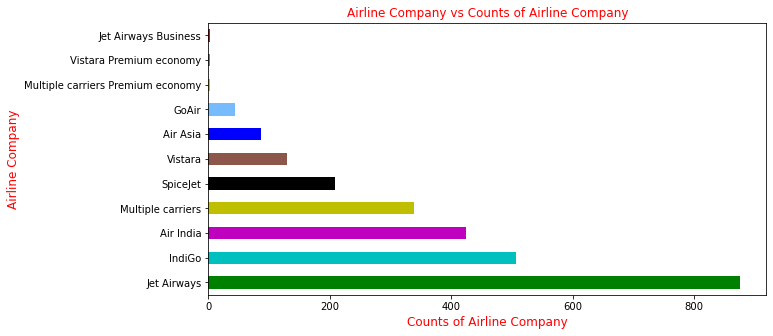

In [26]:
ar.plot.barh(figsize = (10,5), color = ['g','c', 'm', 'y','k','tab:brown','b','xkcd:sky blue','tab:olive','tab:gray','r'])
plt.ylabel('Airline Company', c = 'r', fontsize = 12)
plt.xlabel('Counts of Airline Company', c = 'r', fontsize = 12 )
plt.title('Airline Company vs Counts of Airline Company', c = 'r', fontsize = 12)
plt.show()

#### Above plot shows Jet Airways has highest and Jet Airways Business has lowest flight counts

### Deleate Unwanted Columns

In [28]:
col = ['Date_of_Journey','Dep_Time','Arrival_Time','Duration']

In [29]:
df = df.drop(col, axis = 1)
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Months,Day,NewArrival_Time,NewDep_Time,Dep_Hours,Arrival_Hours,Hours,Minutes,New_Duration
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,04:25:00,17:30:00,1050.0,265.0,10.0,55.0,655.0
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,10:20:00,06:20:00,380.0,620.0,4.0,30.0,270.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2619 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          2619 non-null   object 
 1   Source           2619 non-null   object 
 2   Destination      2619 non-null   object 
 3   Route            2619 non-null   object 
 4   Total_Stops      2619 non-null   object 
 5   Additional_Info  2619 non-null   object 
 6   Months           2619 non-null   int32  
 7   Day              2619 non-null   int32  
 8   NewArrival_Time  2619 non-null   object 
 9   NewDep_Time      2619 non-null   object 
 10  Dep_Hours        2619 non-null   float64
 11  Arrival_Hours    2619 non-null   float64
 12  Hours            2619 non-null   float64
 13  Minutes          2619 non-null   float64
 14  New_Duration     2619 non-null   float64
dtypes: float64(5), int32(2), object(8)
memory usage: 306.9+ KB


### Encodinng Categorical columns

In [31]:
le = LabelEncoder()

In [32]:
df['Airline'] = le.fit_transform(df['Airline'])
df['Source'] = le.fit_transform(df['Source'])
df['Destination'] = le.fit_transform(df['Destination'])
df['Route'] = le.fit_transform(df['Route'])
df['Additional_Info'] = le.fit_transform(df['Additional_Info'])
df['NewArrival_Time'] = le.fit_transform(df['NewArrival_Time'])
df['NewDep_Time'] = le.fit_transform(df['NewDep_Time'])
df['Total_Stops'] = le.fit_transform(df['Total_Stops'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2619 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          2619 non-null   int32  
 1   Source           2619 non-null   int32  
 2   Destination      2619 non-null   int32  
 3   Route            2619 non-null   int32  
 4   Total_Stops      2619 non-null   int32  
 5   Additional_Info  2619 non-null   int32  
 6   Months           2619 non-null   int32  
 7   Day              2619 non-null   int32  
 8   NewArrival_Time  2619 non-null   int32  
 9   NewDep_Time      2619 non-null   int32  
 10  Dep_Hours        2619 non-null   float64
 11  Arrival_Hours    2619 non-null   float64
 12  Hours            2619 non-null   float64
 13  Minutes          2619 non-null   float64
 14  New_Duration     2619 non-null   float64
dtypes: float64(5), int32(10)
memory usage: 225.1 KB


#### Columns are encoded

### Data distribution

---------------------
Distribution Plot :- 
---------------------


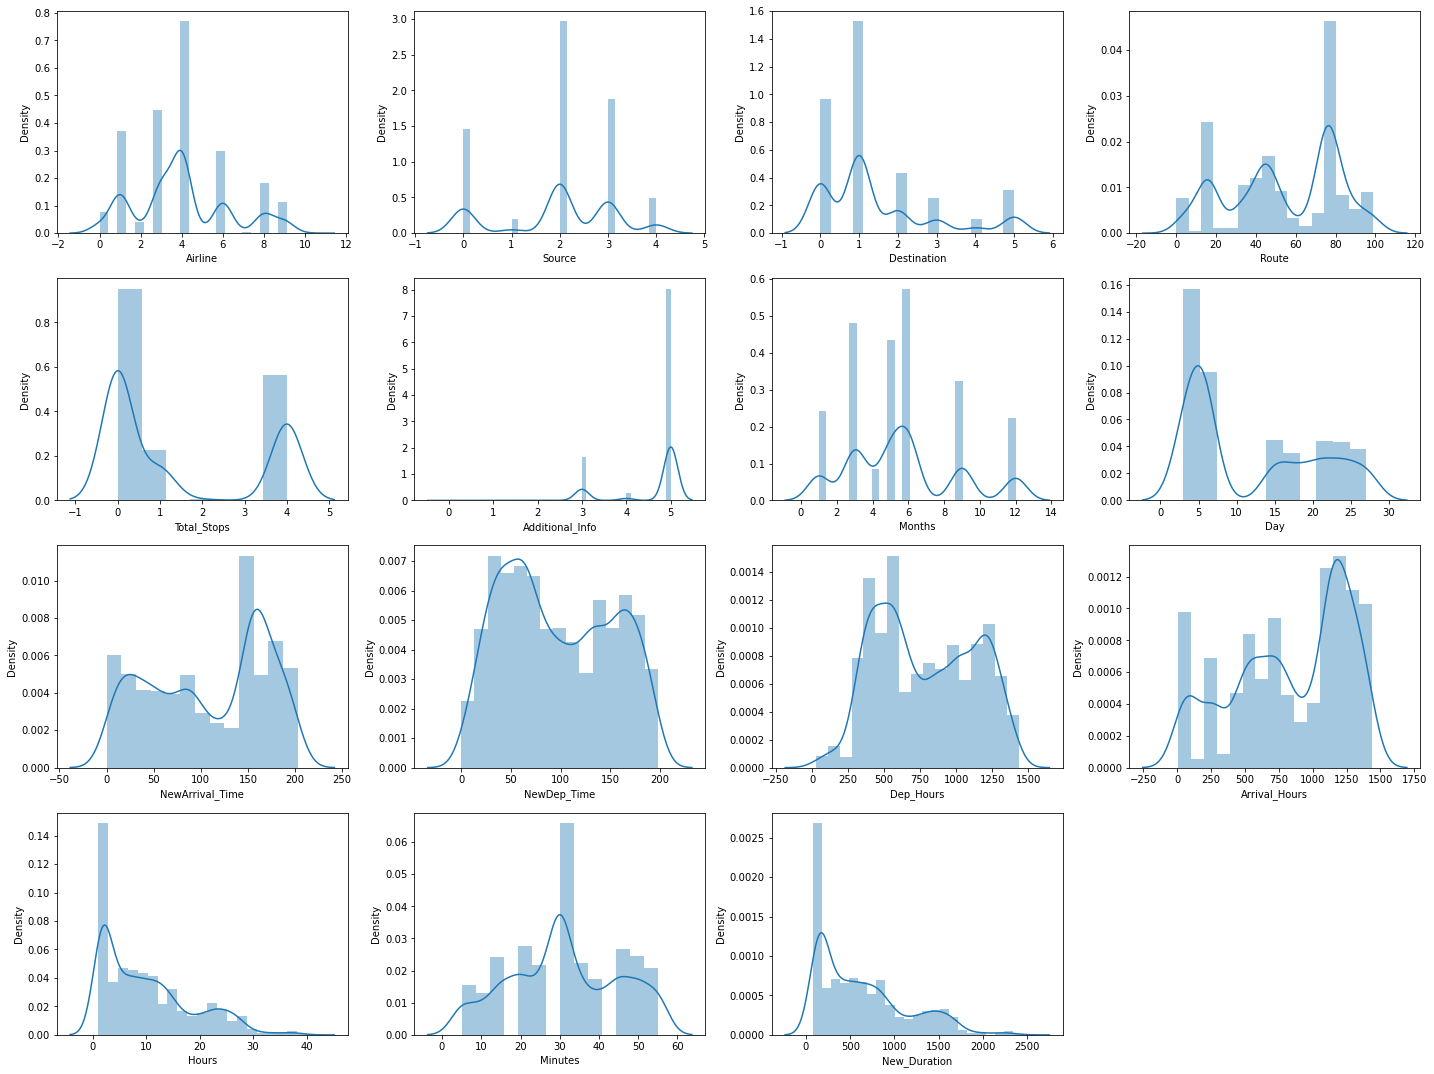

In [33]:
print('---------------------')
print('Distribution Plot :- ')
print('---------------------')
      
plt.figure(figsize = (20,15))
plotnumber = 1

for column in df:
    if plotnumber <=16:
        ax = plt.subplot(4,4, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber +=1
plt.tight_layout()

#### Data distribution is fine

### Data Scaling

In [34]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)
x_scaled

array([[ 0.00547242,  0.02859057, -0.2927839 , ..., -0.00667918,
         1.7152351 ,  0.04117166],
       [-0.42883906,  0.86992434, -0.97620727, ..., -0.72555976,
        -0.07820179, -0.72960444],
       [ 0.00547242,  0.02859057, -0.2927839 , ...,  1.55089542,
         0.99786034,  1.58272386],
       ...,
       [ 0.00547242,  0.02859057, -0.2927839 , ..., -0.4859329 ,
         0.28048559, -0.47935246],
       [-1.29746202,  0.02859057, -0.2927839 , ...,  0.59238798,
        -1.15426393,  0.56169578],
       [ 0.87409539,  0.02859057, -0.2927839 , ...,  0.47257455,
        -0.79557655,  0.45158491]])

### Predict Flight Ticket Price

In [35]:
model = pickle.load(open('Flight Price Prediction Train.pickle', 'rb'))

In [37]:
price = model.predict(df)
price

array([ 9740.454,  4753.524, 14383.318, ..., 14554.69 , 12073.196,
        8697.85 ], dtype=float32)

In [38]:
pred = pd.DataFrame(price)
pred

,0
0,9740.454102
1,4753.523926
2,14383.318359
3,8538.320312
4,4594.645508
...,...
2614,8654.800781
2615,4403.861328
2616,14554.690430
2617,12073.196289


### Saving Predicted Flight Ticket Price into CSV file

In [39]:
pred.to_csv('Predicted Flight Ticket Price.csv', index = False)